In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import regularizers

In [2]:
data = pd.read_csv("./A_Z Handwritten Data.csv")

In [3]:
X = data.drop('0',axis = 1)
y = data['0']


In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

train_x.shape
test_x.shape

(74490, 28, 28)

In [5]:
from keras.datasets import mnist

In [6]:
(train_d, train_t),(test_d, test_t) = mnist.load_data()


In [7]:
train_t = train_t + 26
test_t = test_t + 26

In [8]:
train_da = np.concatenate((train_x, train_d))
train_lab = np.concatenate((train_y, train_t))
test_dat = np.concatenate((test_x, test_d))
test_labe = np.concatenate((test_y, test_t))
train_da.shape
import numpy as np
shuffle_index = np.random.permutation(357960)
train_dat, train_labe = train_da[shuffle_index], train_lab[shuffle_index]

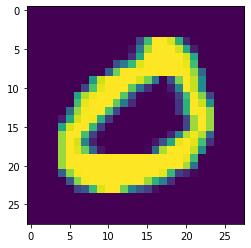

In [9]:
plt.imshow(train_dat[357641])

In [10]:
train_labe[357641]

14

In [11]:
onlyT = []
for i in range(357641):
    if train_labe[i] == 6.0:
        onlyT.append(train_dat[i])

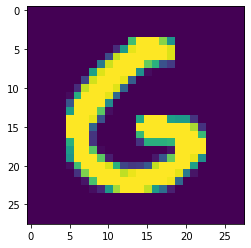

In [12]:
plt.imshow(onlyT[3784])

369173
19


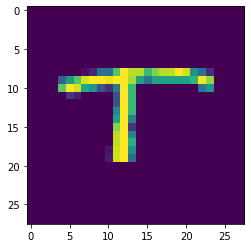

In [13]:
import os
import keras.preprocessing.image as t
train_dir = 'C:/Users/dell/Desktop/Deskto/first in ano/VIII SEM PROJECT/char digit with nepali/train'
train_dir_ka = os.path.join(train_dir, 'ka')
train_dir_kha = os.path.join(train_dir, 'kha')

train_data_kha = []
train_data_ka = []
both = []

for fname in os.listdir(train_dir_ka):
    img = 'C:/Users/dell/Desktop/Deskto/first in ano/VIII SEM PROJECT/char digit with nepali/train/ka/' + fname
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = t.img_to_array(img)
    img = cv2.resize(img, (28, 28))
    img = img.reshape(28, 28)
    ret, img = cv2.threshold(img.copy(), 150, 255, cv2.THRESH_BINARY_INV)
    train_data_ka.append(img)

    
for fname in os.listdir(train_dir_kha):
    img = 'C:/Users/dell/Desktop/Deskto/first in ano/VIII SEM PROJECT/char digit with nepali/train/kha/' + fname
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = t.img_to_array(img)
    img = cv2.resize(img, (28, 28))
    ret, img = cv2.threshold(img.copy(), 150, 255, cv2.THRESH_BINARY_INV)
    train_data_kha.append(img)
    
both = train_data_ka + train_data_kha
both = np.array(both)


ka = []
for i in range(5749):
    ka.append(36)
    
kha = []
for i in range(5464):
    kha.append(37)
    
label = ka + kha
label = np.array(label)



train_data = np.concatenate((train_dat, both))
train_label = np.concatenate((train_labe, label))
print(len(list(train_data)))

shuffle_index = np.random.permutation(369173)
train_data, train_label = train_data[shuffle_index], train_label[shuffle_index]

plt.imshow(train_data[360459])
print(train_label[360459])

1657
1466
87613


31

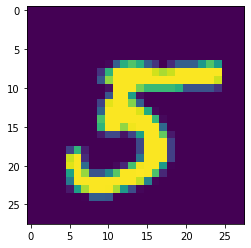

In [14]:
test_dir = 'C:/Users/dell/Desktop/Deskto/first in ano/VIII SEM PROJECT/char digit with nepali/test'
test_dir_ka = os.path.join(test_dir, 'ka')
test_dir_kha = os.path.join(test_dir, 'kha')

test_data_ka = []
test_data_kha = []
both_test = []

for fname in os.listdir(test_dir_ka):
    img = 'C:/Users/dell/Desktop/Deskto/first in ano/VIII SEM PROJECT/char digit with nepali/test/ka/' + fname
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = t.img_to_array(img)
    img = cv2.resize(img, (28, 28))
    img = img.reshape(28, 28)
    ret, img = cv2.threshold(img.copy(), 150, 255, cv2.THRESH_BINARY_INV)
    test_data_ka.append(img)

    
for fname in os.listdir(test_dir_kha):
    img = 'C:/Users/dell/Desktop/Deskto/first in ano/VIII SEM PROJECT/char digit with nepali/test/kha/' + fname
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = t.img_to_array(img)
    img = cv2.resize(img, (28, 28))
    ret, img = cv2.threshold(img.copy(), 150, 255, cv2.THRESH_BINARY_INV)
    
    test_data_kha.append(img)
    
print(len(test_data_ka))
print(len(test_data_kha))
both_test = test_data_ka + test_data_kha
both_test = np.array(both_test)


ka = []
for i in range(1657):
    ka.append(36)
    
kha = []
for i in range(1466):
    kha.append(37)
    
label = ka + kha
label = np.array(label)


test_data = np.concatenate((test_dat, both_test))
test_label = np.concatenate((test_labe, label))
print(len(test_data))

shuffle_index = np.random.permutation(87613)
test_data, test_label = test_data[shuffle_index], test_label[shuffle_index]
plt.imshow(test_data[85097])
test_label[85097]

In [15]:
train_data.shape

(369173, 28, 28)

In [16]:
test_label.shape

(87613,)

In [17]:
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255
train_data = train_data.reshape(369173, 28, 28, 1)
test_data = test_data.reshape(87613, 28, 28, 1)


In [18]:
train_label = to_categorical(train_label)
train_label.shape

(369173, 38)

In [19]:
test_label = to_categorical(test_label)
test_label.shape

(87613, 38)

In [20]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.2))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(.2))

model.add(Dense(units = 38, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(train_data, train_label, validation_data = (test_data, test_label), epochs = 2)

Epoch 1/2
11537/11537 [==============================] - 756s 65ms/step - loss: 0.2128 - accuracy: 0.9388 - val_loss: 0.0808 - val_accuracy: 0.9786
Epoch 2/2
11537/11537 [==============================] - 766s 66ms/step - loss: 0.0993 - accuracy: 0.9716 - val_loss: 0.0653 - val_accuracy: 0.9827


In [23]:
model.save('CD1.h5')

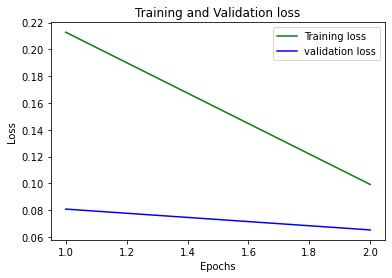

In [24]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,3)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,4)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
word1 = "bishesh"
word2 = 'hsehsib'
word2 = list(word2)

for i in  word1:
    if i in word2:
        word2.remove(i)
    else:
        print("This is not")
        
if len(word2) == 0:
    print("this is ")
else:
    print("this is not")
        

this is 
